In [47]:
import pandas as pd
import numpy as np
import copy
#from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import cross_val_score
#from sklearn.linear_model import LogisticRegression
#from sklearn.linear_model import LinearRegression
from scipy import stats
# 離群值
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import datasets, metrics
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform

#載入資料集
data_path = 'data/Kaggle/'
df_train = pd.read_csv(data_path + 'train.csv', header=None)
df_train_Y = pd.read_csv(data_path + 'trainLabels.csv', header=None)
df_test = pd.read_csv(data_path + 'test.csv.zip', header=None)

#自定義column名稱
l = []
for i in range(40):
        l.append('p'+str(i+1))

df_train = pd.DataFrame(data = np.array(df_train), columns=l)

In [48]:
#確認缺值情況
df_train.isnull().sum().sort_values(ascending=False)

p40    0
p39    0
p18    0
p17    0
p16    0
p15    0
p14    0
p13    0
p12    0
p11    0
p10    0
p9     0
p8     0
p7     0
p6     0
p5     0
p4     0
p3     0
p2     0
p19    0
p20    0
p21    0
p31    0
p38    0
p37    0
p36    0
p35    0
p34    0
p33    0
p32    0
p30    0
p22    0
p29    0
p28    0
p27    0
p26    0
p25    0
p24    0
p23    0
p1     0
dtype: int64

count    1000.000000
mean        0.025596
std         1.008282
min        -3.365711
25%        -0.669010
50%         0.027895
75%         0.762520
max         3.326246
Name: p1, dtype: float64




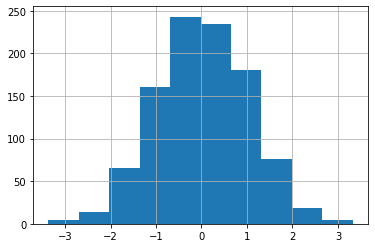

count    1000.000000
mean       -0.024526
std         1.016298
min        -3.492086
25%        -0.693937
50%        -0.033194
75%         0.682753
max         3.583870
Name: p2, dtype: float64




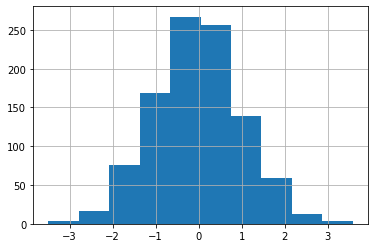

count    1000.000000
mean       -0.024088
std         0.979109
min        -2.695602
25%        -0.698830
50%         0.008145
75%         0.661434
max         2.546507
Name: p3, dtype: float64




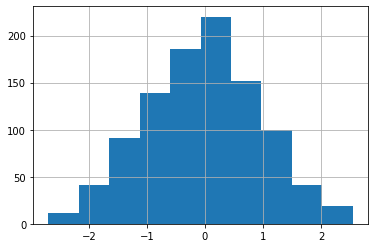

count    1000.000000
mean       -0.002271
std         0.970575
min        -3.460471
25%        -0.617557
50%         0.002327
75%         0.640743
max         3.088738
Name: p4, dtype: float64




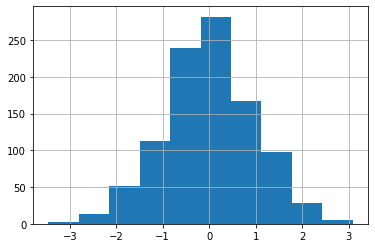

count    1000.000000
mean        1.092329
std         4.538834
min       -16.421901
25%        -1.801997
50%         0.862818
75%         3.843172
max        17.565345
Name: p5, dtype: float64




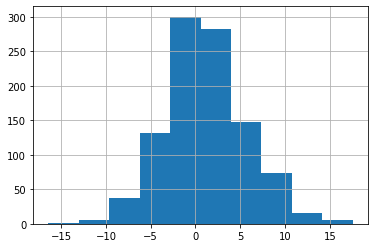

count    1000.000000
mean       -0.006250
std         0.989128
min        -3.041250
25%        -0.732265
50%         0.027041
75%         0.671456
max         3.102997
Name: p6, dtype: float64




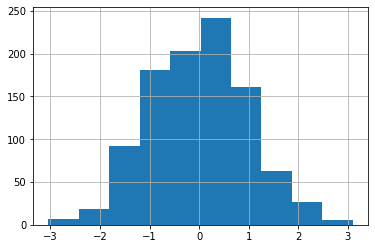

count    1000.000000
mean        0.497342
std         2.118819
min        -7.224761
25%        -0.838619
50%         0.582321
75%         1.913664
max         7.592666
Name: p7, dtype: float64




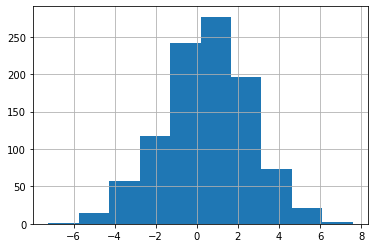

count    1000.000000
mean       -0.037883
std         2.232256
min        -6.509084
25%        -1.604037
50%         0.018809
75%         1.438304
max         7.130097
Name: p8, dtype: float64




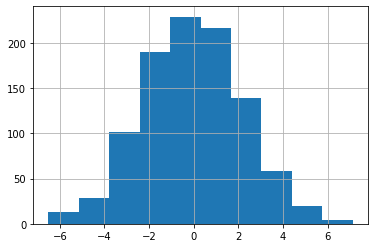

count    1000.000000
mean        0.026391
std         1.001064
min        -3.145588
25%        -0.677562
50%         0.022092
75%         0.741310
max         3.145258
Name: p9, dtype: float64




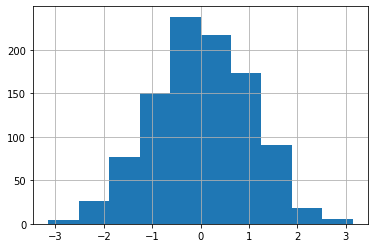

count    1000.000000
mean       -0.003597
std         1.013520
min        -2.749812
25%        -0.682220
50%        -0.036110
75%         0.665364
max         3.919426
Name: p10, dtype: float64




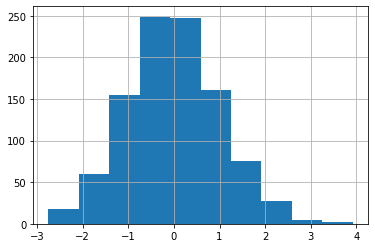

count    1000.000000
mean       -0.016250
std         1.026325
min        -3.304074
25%        -0.713704
50%         0.019479
75%         0.709416
max         3.409653
Name: p11, dtype: float64




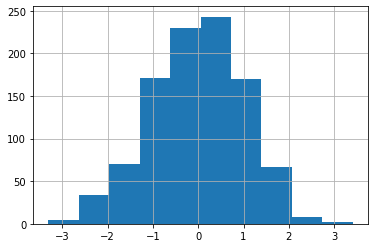

count    1000.000000
mean       -0.038010
std         0.985889
min        -3.157436
25%        -0.730293
50%        -0.075950
75%         0.644553
max         3.253032
Name: p12, dtype: float64




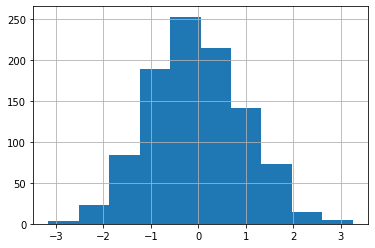

count    1000.000000
mean       -1.985616
std         4.528096
min       -14.706080
25%        -5.094964
50%        -2.103532
75%         1.186164
max        12.186445
Name: p13, dtype: float64




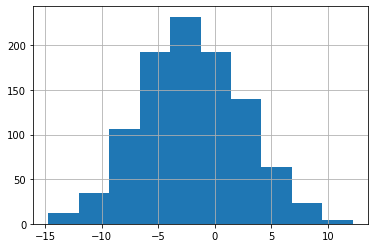

count    1000.000000
mean        0.012374
std         0.995652
min        -3.002151
25%        -0.694081
50%        -0.005946
75%         0.664921
max         3.737423
Name: p14, dtype: float64




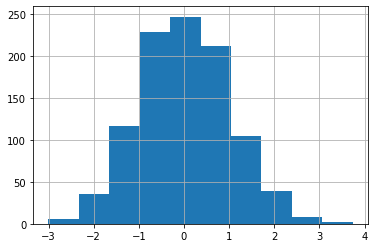

count    1000.000000
mean       -0.029229
std         2.164547
min        -6.790633
25%        -1.441443
50%        -0.033219
75%         1.492611
max         6.959736
Name: p15, dtype: float64




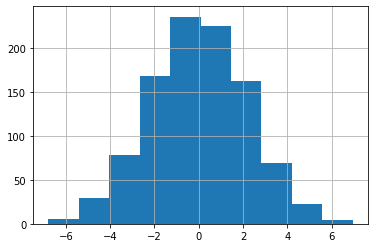

count    1000.000000
mean       -0.039307
std         1.002481
min        -2.914729
25%        -0.757619
50%        -0.019046
75%         0.678748
max         3.100935
Name: p16, dtype: float64




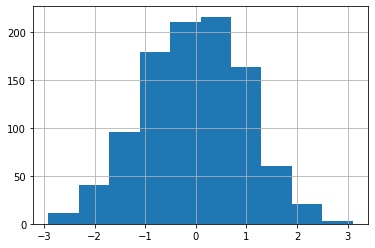

count    1000.000000
mean       -0.004091
std         0.970401
min        -3.464048
25%        -0.668335
50%         0.008360
75%         0.674583
max         2.805197
Name: p17, dtype: float64




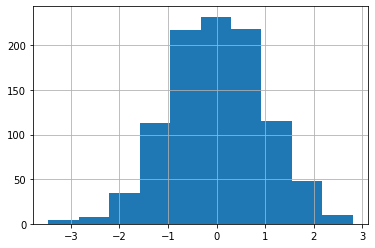

count    1000.000000
mean       -0.032836
std         1.000130
min        -2.944093
25%        -0.727001
50%        -0.011366
75%         0.588732
max         3.291544
Name: p18, dtype: float64




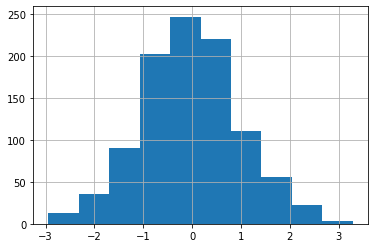

count    1000.000000
mean        0.428313
std         2.176020
min        -8.258306
25%        -0.983595
50%         0.488217
75%         1.915022
max         7.074432
Name: p19, dtype: float64




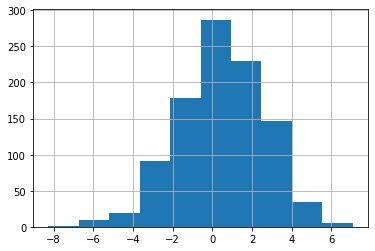

count    1000.000000
mean        0.043427
std         0.987689
min        -3.423875
25%        -0.594638
50%         0.082688
75%         0.711525
max         3.343812
Name: p20, dtype: float64




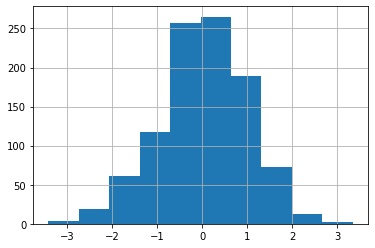

count    1000.000000
mean        0.073461
std         0.967282
min        -4.251382
25%        -0.588171
50%         0.094307
75%         0.727896
max         2.938033
Name: p21, dtype: float64




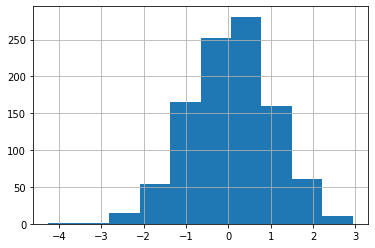

count    1000.000000
mean       -0.005140
std         0.980319
min        -2.822644
25%        -0.698036
50%        -0.004404
75%         0.673427
max         3.053262
Name: p22, dtype: float64




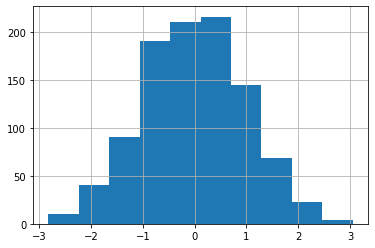

count    1000.000000
mean        0.912288
std         2.178778
min        -6.337522
25%        -0.542526
50%         1.050071
75%         2.367748
max         8.096838
Name: p23, dtype: float64




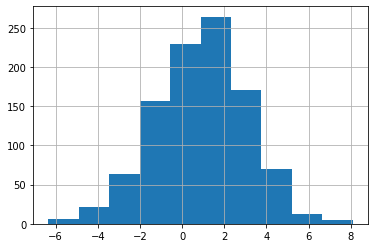

count    1000.000000
mean        0.902301
std         4.241903
min       -16.156070
25%        -1.822188
50%         0.970403
75%         3.825862
max        14.373681
Name: p24, dtype: float64




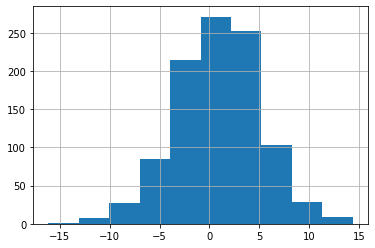

count    1000.000000
mean       -0.023110
std         1.019566
min        -3.218446
25%        -0.720837
50%        -0.012183
75%         0.671318
max         2.981582
Name: p25, dtype: float64




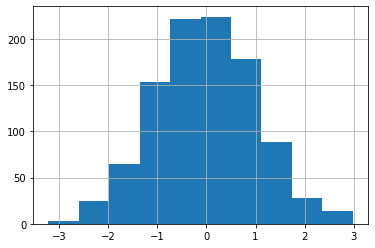

count    1000.000000
mean        0.047473
std         0.995752
min        -2.820792
25%        -0.617001
50%         0.014636
75%         0.731892
max         3.662800
Name: p26, dtype: float64




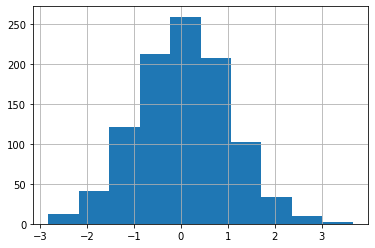

count    1000.000000
mean       -0.041117
std         0.998182
min        -3.023811
25%        -0.668062
50%        -0.017535
75%         0.642797
max         3.293911
Name: p27, dtype: float64




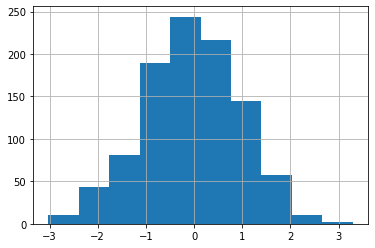

count    1000.000000
mean        0.012985
std         1.030610
min        -3.054384
25%        -0.696411
50%         0.039219
75%         0.706336
max         3.069885
Name: p28, dtype: float64




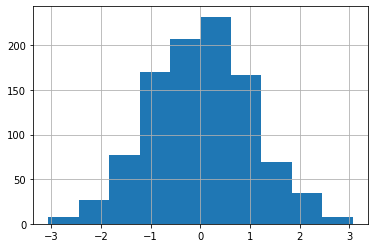

count    1000.000000
mean       -0.395782
std         2.296818
min        -8.034421
25%        -1.936374
50%        -0.489296
75%         1.044188
max         7.413173
Name: p29, dtype: float64




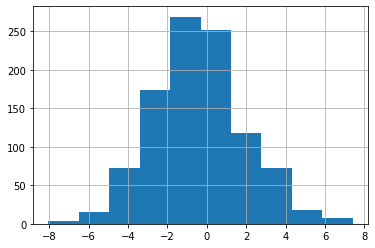

count    1000.000000
mean        0.123921
std         2.410453
min        -7.105723
25%        -1.562374
50%        -0.040604
75%         1.614308
max         8.812739
Name: p30, dtype: float64




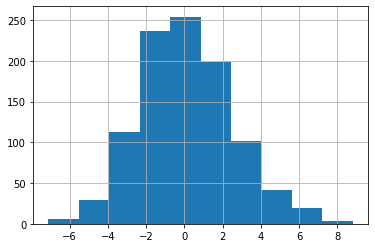

count    1000.000000
mean        0.030651
std         1.011645
min        -3.379194
25%        -0.659457
50%         0.049416
75%         0.747031
max         2.844792
Name: p31, dtype: float64




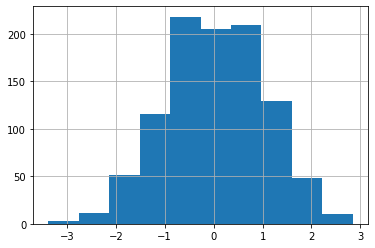

count    1000.000000
mean        0.022951
std         1.001375
min        -2.971125
25%        -0.696032
50%         0.049778
75%         0.699917
max         3.688047
Name: p32, dtype: float64




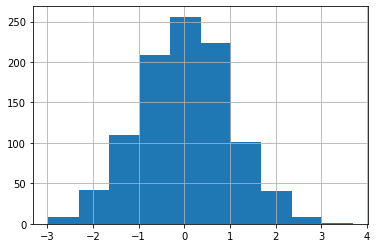

count    1000.000000
mean       -0.542491
std         2.239939
min        -7.840890
25%        -2.121943
50%        -0.568262
75%         0.939348
max         7.160379
Name: p33, dtype: float64




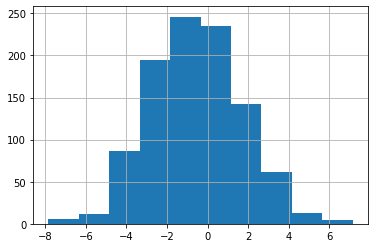

count    1000.000000
mean       -0.011608
std         1.022456
min        -2.999564
25%        -0.664550
50%        -0.028097
75%         0.651374
max         3.353631
Name: p34, dtype: float64




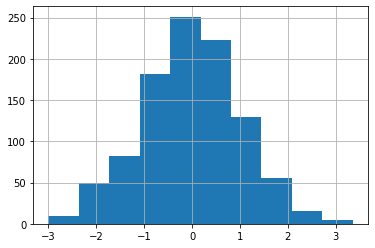

count    1000.000000
mean       -0.483507
std         2.121281
min        -7.124105
25%        -1.879247
50%        -0.493575
75%         1.005795
max         6.005818
Name: p35, dtype: float64




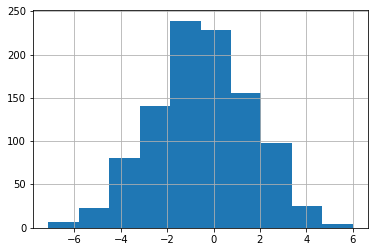

count    1000.000000
mean        0.033371
std         1.007044
min        -2.952358
25%        -0.642861
50%         0.037732
75%         0.691800
max         3.420561
Name: p36, dtype: float64




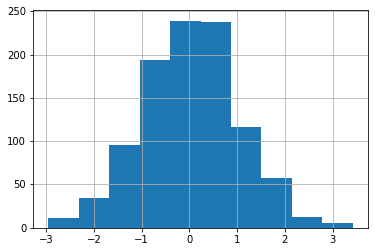

count    1000.000000
mean        0.567185
std         2.227876
min        -5.452254
25%        -1.059786
50%         0.455474
75%         2.122157
max         6.603499
Name: p37, dtype: float64




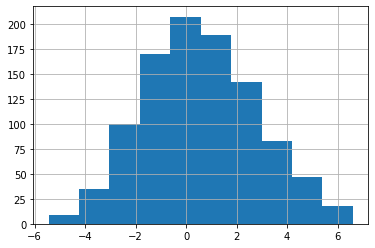

count    1000.000000
mean        0.006849
std         0.997635
min        -3.473913
25%        -0.691162
50%         0.038284
75%         0.693535
max         3.492548
Name: p38, dtype: float64




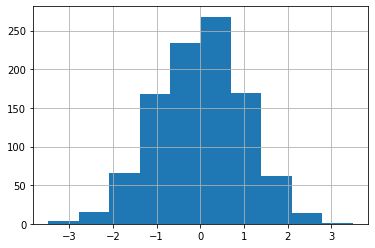

count    1000.000000
mean       -0.892659
std         2.022022
min        -8.051722
25%        -2.220126
50%        -0.855470
75%         0.388698
max         5.774120
Name: p39, dtype: float64




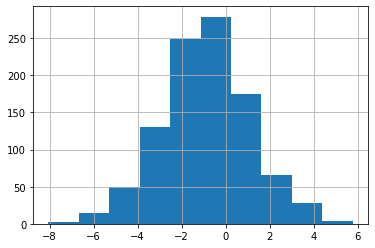

count    1000.000000
mean        0.609451
std         2.045439
min        -7.799086
25%        -0.565041
50%         0.779944
75%         1.992193
max         6.803984
Name: p40, dtype: float64




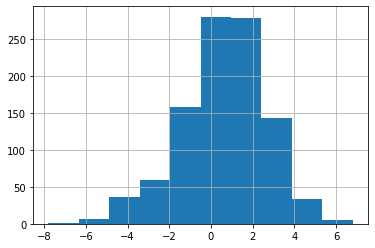

In [49]:
#確認是否有離群值
for col in df_train:
    print(df_train[col].describe())
    df_train[col].hist()
    print('\n')
    plt.show()

In [54]:
# 切分訓練集/驗證集
x_train, x_test, y_train, y_test = train_test_split(df_train, df_train_Y, test_size=0.25, random_state=4)

# 建立模型
clf = GradientBoostingClassifier()

# 設定要訓練的超參數組合
n_estimators = [100, 200, 300, 400, 500]
max_depth = [1, 3, 5, 7 , 9]
loss = ['deviance','exponential']
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth, loss=loss)

grid_search = GridSearchCV(clf, param_grid, scoring="neg_mean_squared_error", n_jobs=-1, verbose=1)

# 開始搜尋最佳參數
grid_result = grid_search.fit(x_train, y_train)
print(grid_result)

# 使用最佳參數重新建立模型
clf_bestparam = GradientBoostingClassifier(loss=grid_result.best_params_['loss'],
                                           max_depth=grid_result.best_params_['max_depth'],
                                           n_estimators=grid_result.best_params_['n_estimators'])
# 訓練模型
search = clf_bestparam.fit(x_train, y_train)

# 預測驗證
y_pred = clf_bestparam.predict(x_test)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   47.1s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.1min finished
D:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_n...
                 

D:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [55]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)

Acuuracy:  0.9


In [57]:
#使用測試集測試資料
y_pred = clf_bestparam.predict(df_test)
y_pred = pd.DataFrame(data = np.array(y_pred), columns=['Solution'])

#add new column Id (by index)
y_pred['Id'] = y_pred.index + 1

print(y_pred)
y_pred.to_csv('test_result.csv', index=False)

      Solution    Id
0            1     1
1            0     2
2            1     3
3            0     4
4            0     5
...        ...   ...
8995         0  8996
8996         1  8997
8997         1  8998
8998         0  8999
8999         1  9000

[9000 rows x 2 columns]
